In notebook 2, we have seen that we can use summary listings and extract the latitude and longitude data. Now let's see if we can use this and not rely on GeoJson file. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
import os
import json

pd.options.display.max_colwidth=200
%matplotlib inline

In [2]:
# data directory
data_dir = "../data"
raw_data = os.path.join(data_dir, "raw")

In [3]:
df = pd.read_csv(os.path.join(raw_data, "summary_listings.csv"))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48864 entries, 0 to 48863
Data columns (total 16 columns):
id                                48864 non-null int64
name                              48848 non-null object
host_id                           48864 non-null int64
host_name                         48846 non-null object
neighbourhood_group               48864 non-null object
neighbourhood                     48864 non-null object
latitude                          48864 non-null float64
longitude                         48864 non-null float64
room_type                         48864 non-null object
price                             48864 non-null int64
minimum_nights                    48864 non-null int64
number_of_reviews                 48864 non-null int64
last_review                       38733 non-null object
reviews_per_month                 38733 non-null float64
calculated_host_listings_count    48864 non-null int64
availability_365                  48864 non-null int64

In [7]:
import geopandas

In [65]:
geo_df = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.longitude, df.latitude))

In [66]:
geo_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,46,2019-07-14,0.39,2,288,POINT (-73.98376999999999 40.75362)
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,POINT (-73.9419 40.80902)
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,274,2019-07-26,4.64,1,212,POINT (-73.95976 40.68514)
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,POINT (-73.94399 40.79851)
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,75,2019-07-21,0.60,1,127,POINT (-73.97499999999999 40.74767)


In [67]:
cols = ['price', 'neighbourhood', 'neighbourhood_group', 'geometry']

In [68]:
geo_df1 = geo_df[cols]

In [69]:
geo_df1.head()

,price,neighbourhood,neighbourhood_group,geometry
0,225,Midtown,Manhattan,POINT (-73.98376999999999 40.75362)
1,150,Harlem,Manhattan,POINT (-73.9419 40.80902)
2,89,Clinton Hill,Brooklyn,POINT (-73.95976 40.68514)
3,80,East Harlem,Manhattan,POINT (-73.94399 40.79851)
4,200,Murray Hill,Manhattan,POINT (-73.97499999999999 40.74767)


<Figure size 432x288 with 0 Axes>

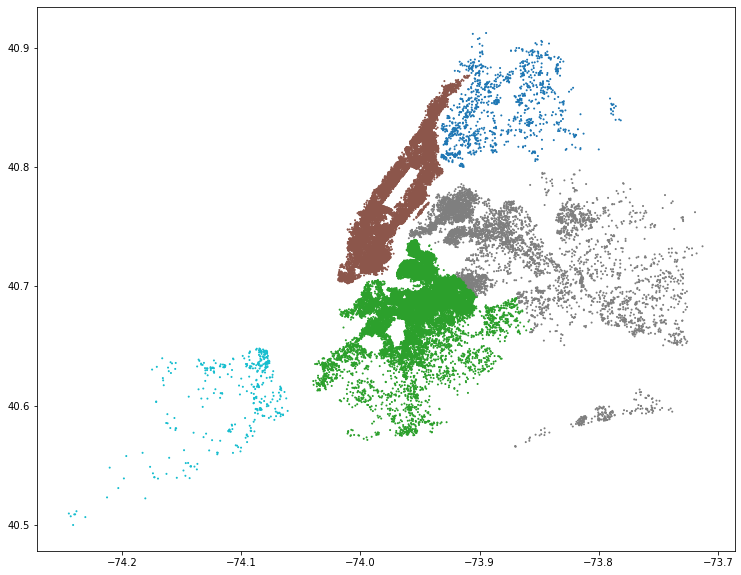

In [41]:
plt.figure()
geo_df1.plot(figsize=(20, 10), column='neighbourhood_group', markersize=1)
plt.show()

In [51]:
len(geo_df1.groupby('neighbourhood')['price'].mean().values)

222

In [52]:
geo_df1.shape

(48864, 5)

In [70]:
price_grouped = geo_df1.groupby('neighbourhood')[['price']].mean()
price_grouped.head()

,price
neighbourhood,
Allerton,91.365854
Arden Heights,67.250000
Arrochar,112.304348
Arverne,173.488372
Astoria,114.154428


In [71]:
price_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222 entries, Allerton to Woodside
Data columns (total 1 columns):
price    222 non-null float64
dtypes: float64(1)
memory usage: 3.5+ KB


In [72]:
geo_df1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 48864 entries, 0 to 48863
Data columns (total 4 columns):
price                  48864 non-null int64
neighbourhood          48864 non-null object
neighbourhood_group    48864 non-null object
geometry               48864 non-null object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


In [79]:
geo_df2 = pd.merge(geo_df1, price_grouped, left_on='neighbourhood', right_index=True)

In [80]:
geo_df2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 48864 entries, 0 to 47617
Data columns (total 5 columns):
price_x                48864 non-null int64
neighbourhood          48864 non-null object
neighbourhood_group    48864 non-null object
geometry               48864 non-null object
price_y                48864 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.2+ MB


In [82]:
geo_df2.rename({'price_y': 'mean_neibhourhood_price'}, axis=1, inplace=True)

In [83]:
geo_df2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 48864 entries, 0 to 47617
Data columns (total 5 columns):
price_x                    48864 non-null int64
neighbourhood              48864 non-null object
neighbourhood_group        48864 non-null object
geometry                   48864 non-null object
mean_neibhourhood_price    48864 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.2+ MB


In [88]:
geo_df2['neighbourhood_group'] == 'Manhattan'

Manhattan        21456
Brooklyn         20114
Queens            5811
Bronx             1105
Staten Island      378
Name: neighbourhood_group, dtype: int64

<Figure size 432x288 with 0 Axes>

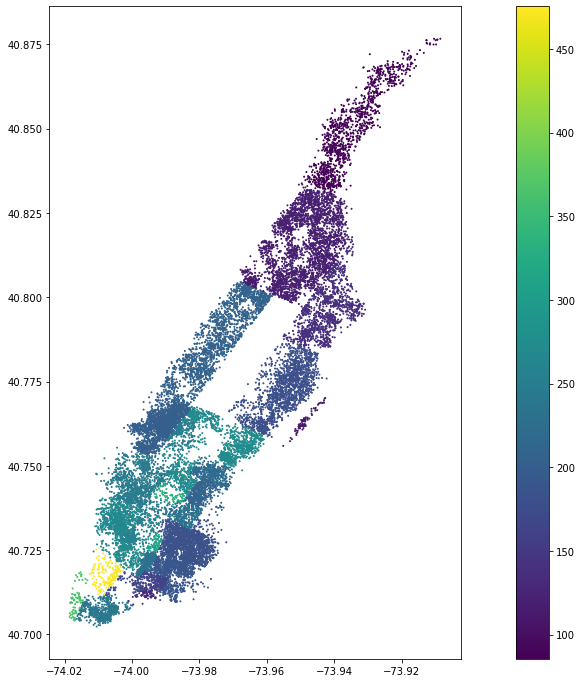

In [92]:
plt.figure()
geo_df2[geo_df2['neighbourhood_group'] == 'Manhattan'].plot(figsize=(20, 12), 
                                                           column='mean_neibhourhood_price', 
                                                           markersize=1,
                                                           legend=True)
plt.show()

In [15]:
nbhoods = geopandas.read_file('../data/raw/neighbourhoods.geojson')

In [16]:
nbhoods.head()

,neighbourhood,neighbourhood_group,geometry
0,Bayswater,Queens,"(POLYGON ((-73.76670799999999 40.614911, -73.768253 40.614878, -73.773977 40.616004, -73.77363099999999 40.616327, -73.76873500000001 40.620901, -73.767459 40.620511, -73.76697799999999 40.616919,..."
1,Allerton,Bronx,"(POLYGON ((-73.848597 40.87167, -73.845823 40.870239, -73.85455899999999 40.859954, -73.854665 40.859586, -73.85638899999999 40.857594, -73.868882 40.857223, -73.868318 40.857862, -73.869553999999..."
2,City Island,Bronx,"(POLYGON ((-73.782822 40.843919, -73.782572 40.843295, -73.782607 40.843286, -73.782785 40.843755, -73.783092 40.843685, -73.78287400000001 40.843124, -73.782901 40.843118, -73.78313300000001 40.8..."
3,Ditmars Steinway,Queens,"(POLYGON ((-73.90160299999999 40.76777, -73.90390600000001 40.76814, -73.904667 40.768545, -73.90560499999999 40.768717, -73.916607 40.770407, -73.91726199999999 40.770785, -73.92232300000001 40.7..."
4,Ozone Park,Queens,"(POLYGON ((-73.83754399999999 40.691364, -73.83108300000001 40.678151, -73.83087500000001 40.678109, -73.83094 40.67812, -73.83208 40.675261, -73.83305300000001 40.675412, -73.83375599999999 40.67..."


In [31]:
subway = geopandas.read_file('../data/raw/subway.geojson')

In [32]:
subway.head()

,name,url,line,objectid,notes,geometry
0,Astor Pl,http://web.mta.info/nyct/service/,4-6-6 Express,1,"4 nights, 6-all times, 6 Express-weekdays AM southbound, PM northbound",POINT (-73.99106999861966 40.73005400028978)
1,Canal St,http://web.mta.info/nyct/service/,4-6-6 Express,2,"4 nights, 6-all times, 6 Express-weekdays AM southbound, PM northbound",POINT (-74.00019299927328 40.71880300107709)
2,50th St,http://web.mta.info/nyct/service/,1-2,3,"1-all times, 2-nights",POINT (-73.98384899986625 40.76172799961419)
3,Bergen St,http://web.mta.info/nyct/service/,2-3-4,4,"4-nights, 3-all other times, 2-all times",POINT (-73.97499915116808 40.68086213682956)
4,Pennsylvania Ave,http://web.mta.info/nyct/service/,3-4,5,"4-nights, 3-all other times",POINT (-73.89488591154061 40.66471445143568)


In [33]:
subway.shape

(473, 6)

In [34]:
subway.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 6 columns):
name        473 non-null object
url         473 non-null object
line        473 non-null object
objectid    473 non-null object
notes       473 non-null object
geometry    473 non-null object
dtypes: object(6)
memory usage: 22.3+ KB


<Figure size 432x288 with 0 Axes>

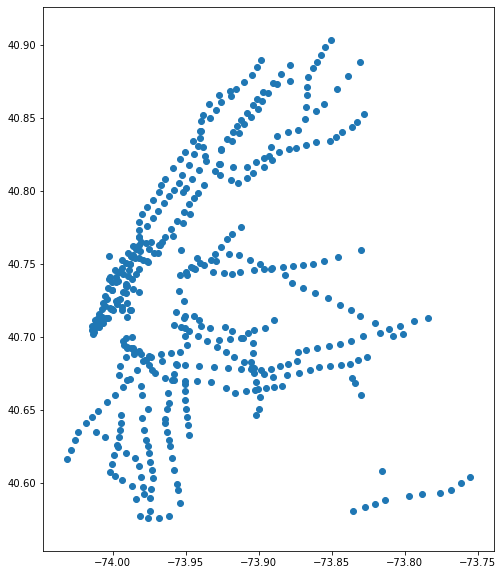

In [37]:
plt.figure()
subway.plot(figsize=(20, 10))
plt.show()